## ✅ Python Simulation Plan

* Generate ECG Signal
* Add Noise (Motion Artifact, Powerline, 1/f Flicker Noise)
* LNA
* Apply Bandpass Filtering
* Implement Thresholding & Peak Detection
* Evaluate Detection Accuracy & Heart Rates

1.  Import Libraries

In [3]:
# Install missing packages
%pip install numpy matplotlib scipy

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2. Generate Clean ECG Signal

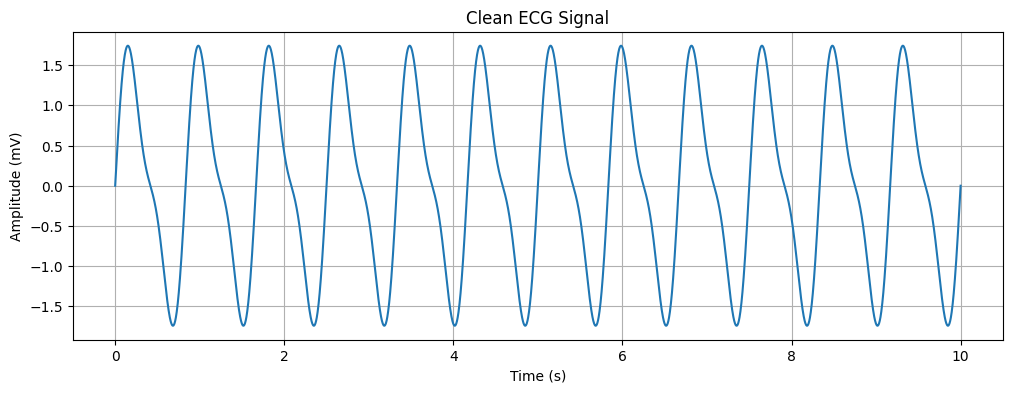

In [4]:
# Time setup
fs = 500  # Sampling frequency (Hz)
t = np.linspace(0, 10, 10 * fs)  # 10 seconds

# Clean ECG signal (simplified sine components for heartbeat)
ecg_clean = 1.5 * np.sin(2 * np.pi * 1.2 * t) + 0.5 * np.sin(2 * np.pi * 2.4 * t)

# Plot clean ECG
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_clean)
plt.title('Clean ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid()
plt.show()


3. Add Noise (Motion, Powerline, Flicker)

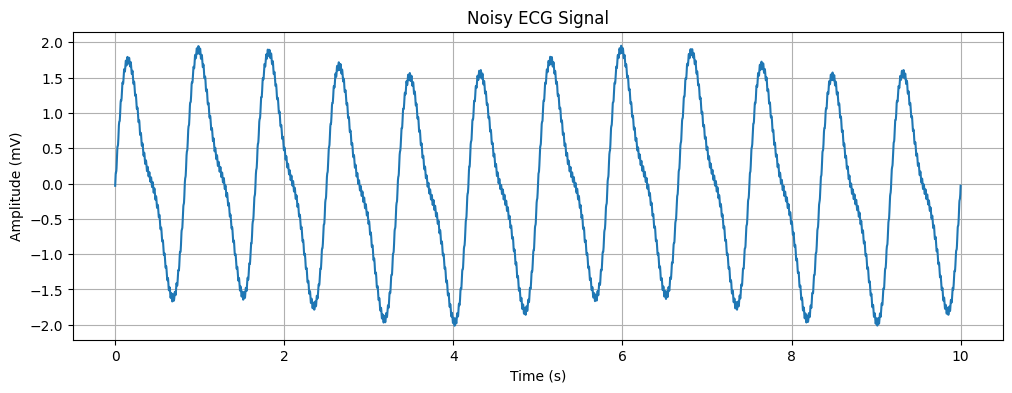

In [5]:
# Motion artifact (baseline wander)
motion_artifact = 0.2 * np.sin(2 * np.pi * 0.2 * t)

# Powerline noise (50Hz)
powerline_noise = 0.05 * np.sin(2 * np.pi * 50 * t)

# 1/f flicker noise (Pink noise approximation)
def flicker_noise(length, beta=1):
    freqs = np.fft.rfftfreq(length, d=1/fs)
    amplitude = 1 / (freqs + 1e-4)**(beta / 2.0)
    phases = np.random.uniform(0, 2 * np.pi, len(freqs))
    noise = amplitude * (np.cos(phases) + 1j * np.sin(phases))
    time_domain_noise = np.fft.irfft(noise)
    return time_domain_noise / np.max(np.abs(time_domain_noise)) * 0.05

flicker = flicker_noise(len(t))

# Composite noisy ECG
ecg_noisy = ecg_clean + motion_artifact + powerline_noise + flicker

# Plot noisy ECG
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_noisy)
plt.title('Noisy ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid()
plt.show()


4. Bandpass Filtering (0.5 Hz – 155 Hz)

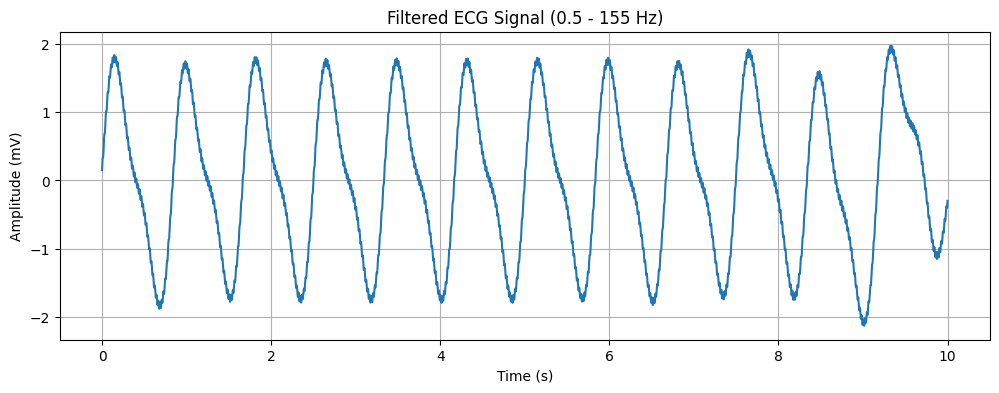

In [6]:
def bandpass_filter(data, lowcut=0.5, highcut=155.0, fs=500, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

# Use the previously defined ecg_noisy
ecg_filtered = bandpass_filter(ecg_noisy)

# Plot filtered ECG
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_filtered)
plt.title('Filtered ECG Signal (0.5 - 155 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid()
plt.show()


5. LNA SIMULATION

In [7]:

# Recreate the context from notebook to get ecg_filtered
fs = 500  # Sampling frequency
t = np.linspace(0, 10, 10 * fs)

# Clean ECG
ecg_clean = 1.5 * np.sin(2 * np.pi * 1.2 * t) + 0.5 * np.sin(2 * np.pi * 2.4 * t)

# Noise sources
motion_artifact = 0.2 * np.sin(2 * np.pi * 0.2 * t)
powerline_noise = 0.05 * np.sin(2 * np.pi * 50 * t)

def flicker_noise(length, beta=1):
    freqs = np.fft.rfftfreq(length, d=1/fs)
    amplitude = 1 / (freqs + 1e-4)**(beta / 2.0)
    phases = np.random.uniform(0, 2 * np.pi, len(freqs))
    noise = amplitude * (np.cos(phases) + 1j * np.sin(phases))
    time_domain_noise = np.fft.irfft(noise)
    return time_domain_noise / np.max(np.abs(time_domain_noise)) * 0.05

flicker = flicker_noise(len(t))

# Composite noisy ECG
ecg_noisy = ecg_clean + motion_artifact + powerline_noise + flicker

# Bandpass filter (0.5 - 155 Hz)
def bandpass_filter(data, lowcut=0.5, highcut=155.0, fs=500, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

ecg_filtered = bandpass_filter(ecg_noisy)

# Simulate LNA Amplifier with 60 dB Gain
gain_db = 60
gain_linear = 10 ** (gain_db / 20)
ecg_amplified = ecg_filtered * gain_linear

# Plot original vs amplified signals (first 5 seconds)
import pandas as pd
# Display the dataframe using pandas
df_amplified = pd.DataFrame({
    "Time (s)": t[:1000],
    "Filtered ECG (mV)": ecg_filtered[:1000],
    "Amplified ECG (mV)": ecg_amplified[:1000]
})
print(df_amplified.head())


   Time (s)  Filtered ECG (mV)  Amplified ECG (mV)
0  0.000000           0.154257          154.256931
1  0.002000           0.221290          221.289578
2  0.004001           0.278412          278.411755
3  0.006001           0.313605          313.604955
4  0.008002           0.328475          328.474778


5.1 📊Time-Domain Plot of Filtered vs Amplified ECG

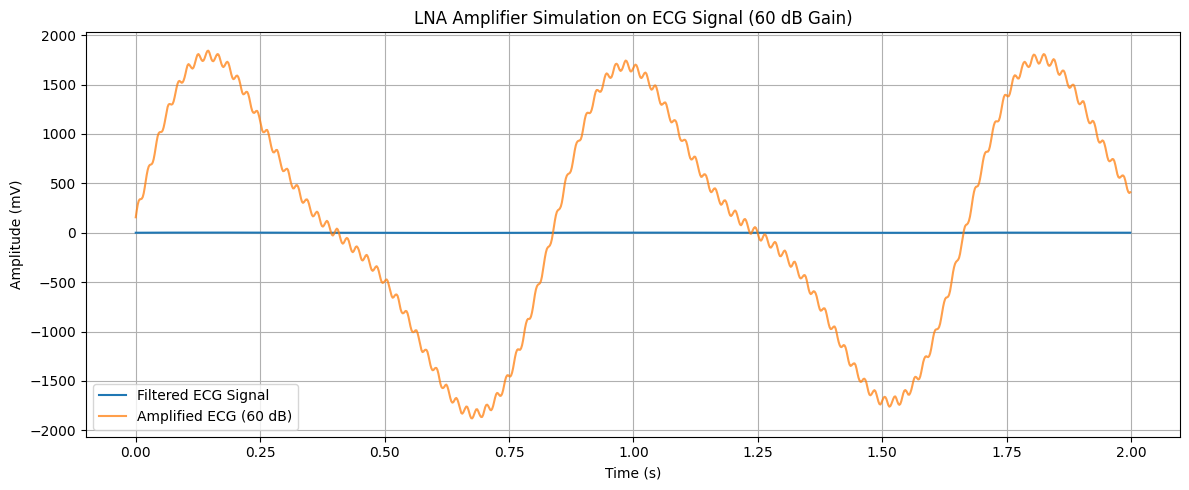

In [11]:
# Sampling frequency and time vector
fs = 500  # Hz
t = np.linspace(0, 10, 10 * fs)

# Generate a clean ECG-like signal
ecg_clean = 1.5 * np.sin(2 * np.pi * 1.2 * t) + 0.5 * np.sin(2 * np.pi * 2.4 * t)

# Add noise
motion_artifact = 0.2 * np.sin(2 * np.pi * 0.2 * t)
powerline_noise = 0.05 * np.sin(2 * np.pi * 50 * t)

def flicker_noise(length, beta=1):
    freqs = np.fft.rfftfreq(length, d=1/fs)
    amplitude = 1 / (freqs + 1e-4)**(beta / 2.0)
    phases = np.random.uniform(0, 2 * np.pi, len(freqs))
    noise = amplitude * (np.cos(phases) + 1j * np.sin(phases))
    time_domain_noise = np.fft.irfft(noise)
    return time_domain_noise / np.max(np.abs(time_domain_noise)) * 0.05

flicker = flicker_noise(len(t))

# Combine all into noisy ECG
ecg_noisy = ecg_clean + motion_artifact + powerline_noise + flicker

# Bandpass filter function
def bandpass_filter(data, lowcut=0.5, highcut=155.0, fs=500, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

# Filter noisy ECG
ecg_filtered = bandpass_filter(ecg_noisy)

# Simulate 60 dB gain
gain_db = 60
gain_linear = 10 ** (gain_db / 20)
ecg_amplified = ecg_filtered * gain_linear

# Plotting
sample_range = 1000
plt.figure(figsize=(12, 5))
plt.plot(t[:sample_range], ecg_filtered[:sample_range], label='Filtered ECG Signal')
plt.plot(t[:sample_range], ecg_amplified[:sample_range], label='Amplified ECG (60 dB)', alpha=0.75)
plt.title('LNA Amplifier Simulation on ECG Signal (60 dB Gain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


5.2 Generating ECG Signals for the LNA

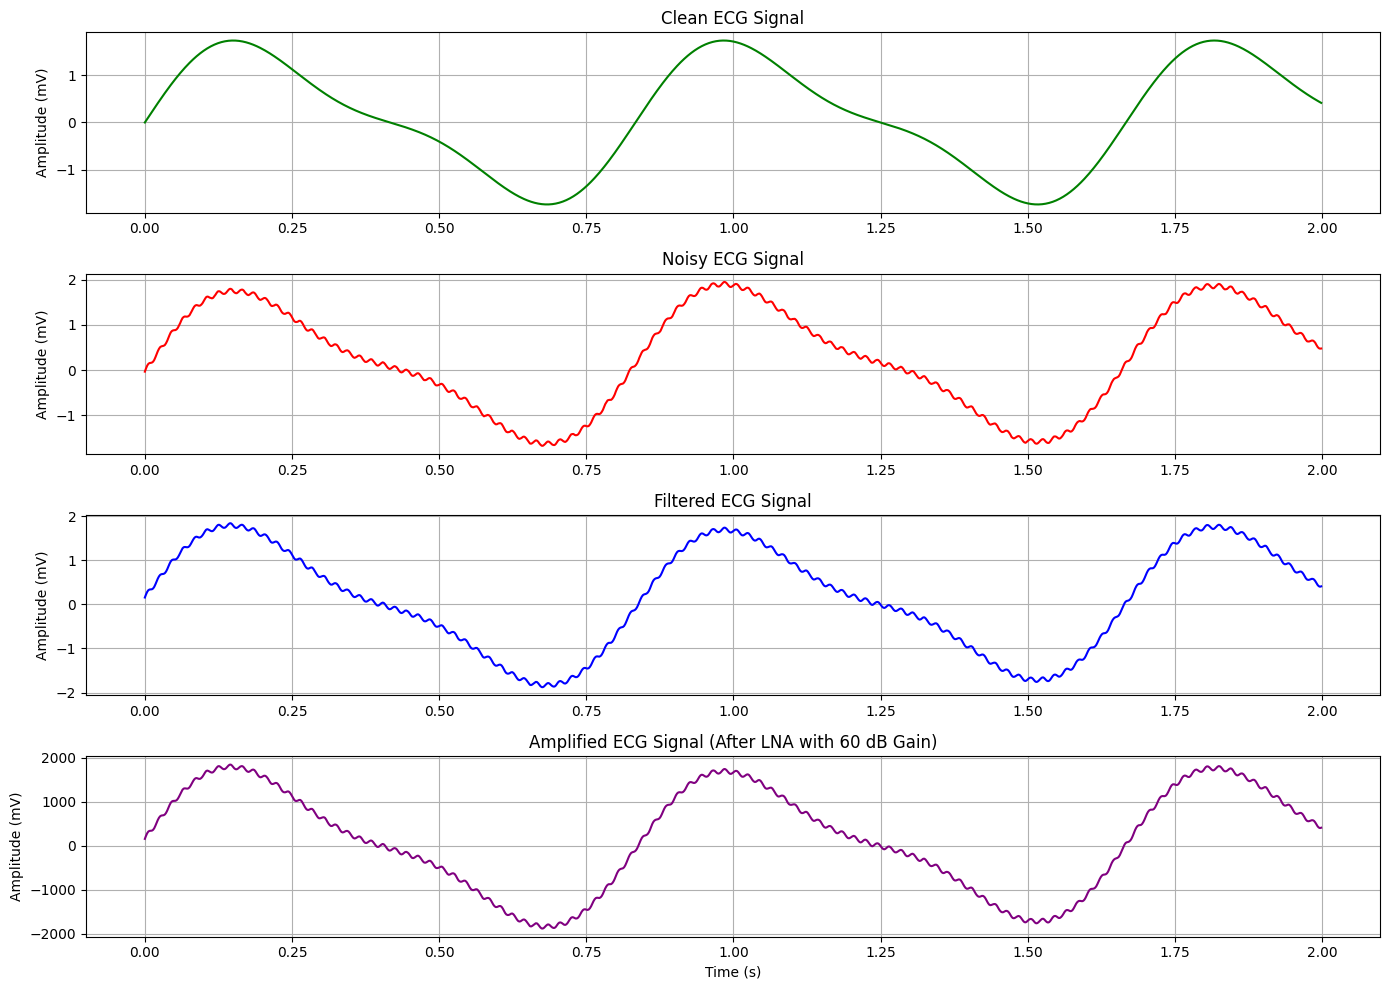

In [12]:
# Plotting the ECG signal (clean, noisy, filtered, and amplified) for comparison

plt.figure(figsize=(14, 10))

# Clean ECG
plt.subplot(4, 1, 1)
plt.plot(t[:1000], ecg_clean[:1000], label='Clean ECG', color='green')
plt.title('Clean ECG Signal')
plt.ylabel('Amplitude (mV)')
plt.grid(True)

# Noisy ECG
plt.subplot(4, 1, 2)
plt.plot(t[:1000], ecg_noisy[:1000], label='Noisy ECG', color='red')
plt.title('Noisy ECG Signal')
plt.ylabel('Amplitude (mV)')
plt.grid(True)

# Filtered ECG
plt.subplot(4, 1, 3)
plt.plot(t[:1000], ecg_filtered[:1000], label='Filtered ECG', color='blue')
plt.title('Filtered ECG Signal')
plt.ylabel('Amplitude (mV)')
plt.grid(True)

# Amplified ECG
plt.subplot(4, 1, 4)
plt.plot(t[:1000], ecg_amplified[:1000], label='Amplified ECG (60 dB)', color='purple')
plt.title('Amplified ECG Signal (After LNA with 60 dB Gain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)

plt.tight_layout()
plt.show()


6. Peak Detection with Dynamic Threshold

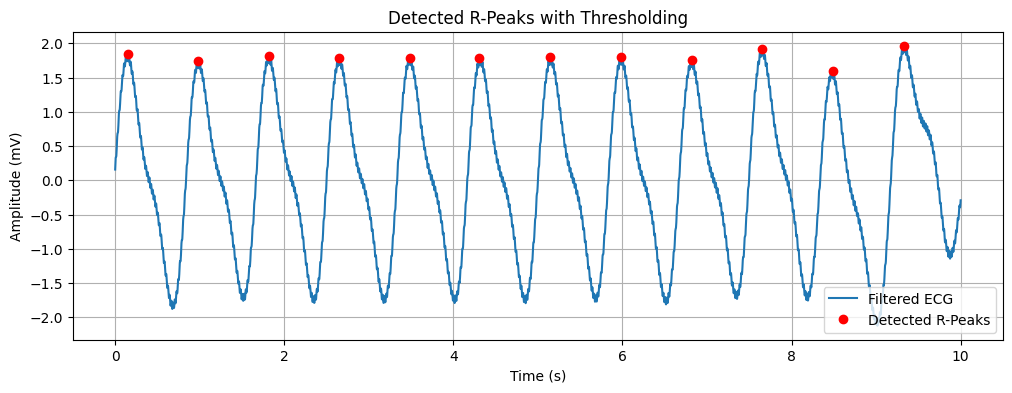

In [13]:
# Dynamic threshold (percentage of maximum amplitude)
threshold = 0.6 * np.max(ecg_filtered)

# Find peaks above threshold and with minimum distance
peaks, _ = signal.find_peaks(ecg_filtered, height=threshold, distance=0.6 * fs)

# Plot detected peaks
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_filtered, label='Filtered ECG')
plt.plot(t[peaks], ecg_filtered[peaks], 'ro', label='Detected R-Peaks')
plt.title('Detected R-Peaks with Thresholding')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.grid()
plt.show()


7. Evaluate Heart Rate (BPM)

Heart Rates (BPM): [71.58472554 71.41428571 73.15609756 71.41428571 73.15609756 71.41428571
 71.41428571 71.41428571 73.15609756 71.41428571 71.41428571]


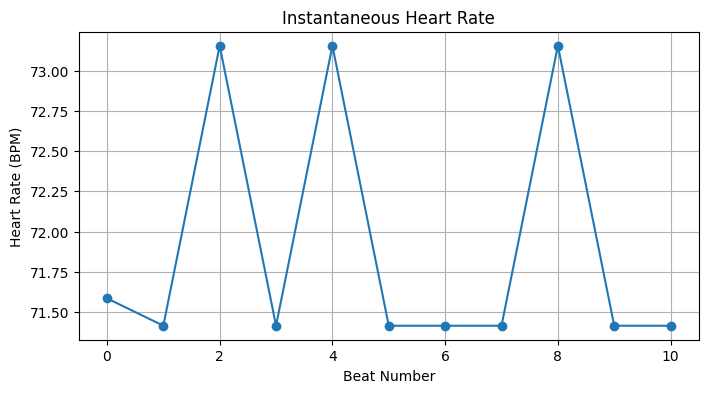

In [14]:
# RR intervals in seconds
rr_intervals = np.diff(t[peaks])

# Convert to Beats Per Minute (BPM)
heart_rates = 60 / rr_intervals

# Display and plot heart rates
print("Heart Rates (BPM):", heart_rates)

plt.figure(figsize=(8, 4))
plt.plot(heart_rates, '-o')
plt.title('Instantaneous Heart Rate')
plt.xlabel('Beat Number')
plt.ylabel('Heart Rate (BPM)')
plt.grid()
plt.show()


8. SIMULATION ON SR LATCH AND AND

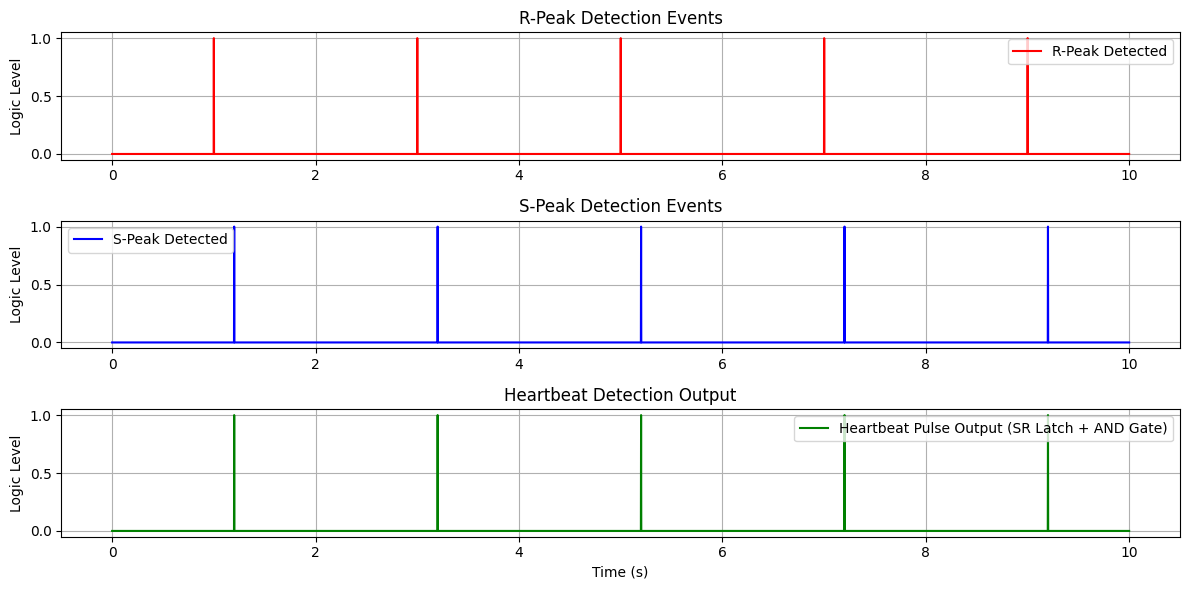

In [15]:


# Let's assume we already have peak detection from adaptive thresholding:
# We'll simulate R-peak and S-peak detection events

# Time setup
fs = 500  # Sampling frequency
t = np.linspace(0, 10, 10 * fs)

# Simulated detected R-peaks (red markers)
r_peaks_times = [1, 3, 5, 7, 9]  # seconds
r_peaks_indices = [int(tp * fs) for tp in r_peaks_times]

# Simulated detected S-peaks (blue markers) slightly after R-peaks
s_peaks_times = [1.2, 3.2, 5.2, 7.2, 9.2]  # seconds
s_peaks_indices = [int(tp * fs) for tp in s_peaks_times]

# Signals to represent detection events (1 when detected, 0 otherwise)
r_signal = np.zeros_like(t)
s_signal = np.zeros_like(t)

# Mark detection points
r_signal[r_peaks_indices] = 1
s_signal[s_peaks_indices] = 1

# SR Latch + AND Gate Logic Simulation
sr_latch_state = 0
heartbeat_output = np.zeros_like(t)

for i in range(len(t)):
    if r_signal[i] == 1:
        sr_latch_state = 1  # Set the latch (R-peak detected)
        
    if s_signal[i] == 1 and sr_latch_state == 1:
        # If both conditions met (R-peak followed by S-peak)
        heartbeat_output[i] = 1  # Confirmed heartbeat output pulse
        sr_latch_state = 0  # Reset the latch

# Plot the simulation results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, r_signal, 'r', label='R-Peak Detected')
plt.legend()
plt.title('R-Peak Detection Events')
plt.ylabel('Logic Level')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, s_signal, 'b', label='S-Peak Detected')
plt.legend()
plt.title('S-Peak Detection Events')
plt.ylabel('Logic Level')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, heartbeat_output, 'g', label='Heartbeat Pulse Output (SR Latch + AND Gate)')
plt.legend()
plt.title('Heartbeat Detection Output')
plt.xlabel('Time (s)')
plt.ylabel('Logic Level')
plt.grid(True)

plt.tight_layout()
plt.show()


## ✅ Next Steps (Optional Enhancements):

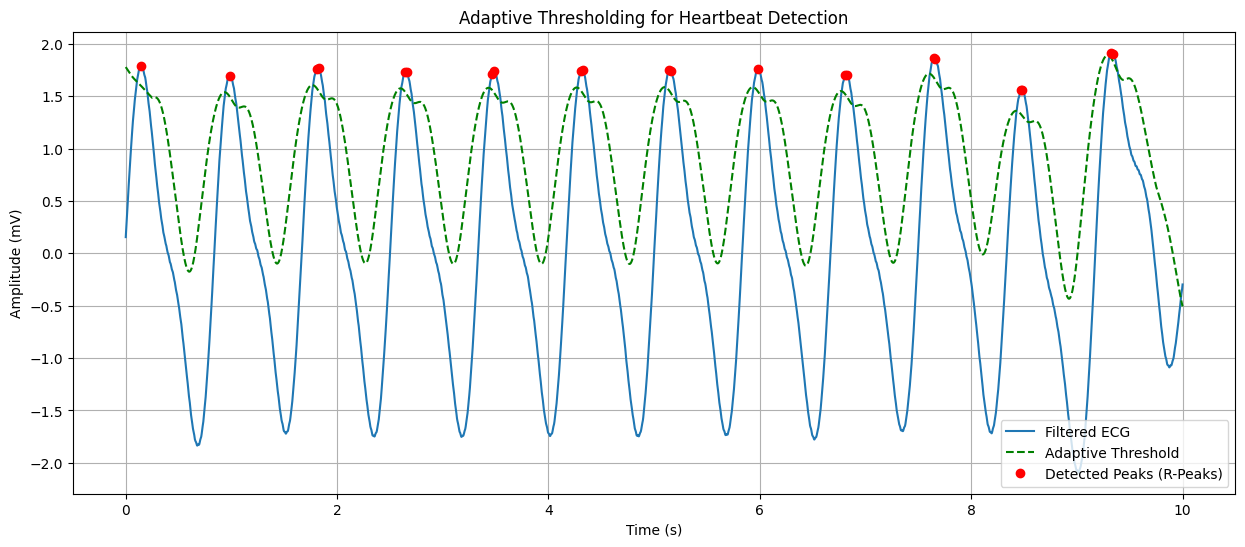

Heart Rates (BPM): [  71.41428571   72.97810219 3332.66666667   73.15609756 3332.66666667
   74.42679901 3749.25         72.97810219 3749.25         72.97810219
 3749.25         72.80097087   72.97810219 3749.25         72.80097087
 4284.85714286   74.42679901 3749.25         71.24465558 3749.25      ]


In [16]:


# 1. Generate or load an ECG-like signal
fs = 500  # Sampling frequency
t = np.linspace(0, 10, 10 * fs)
ecg_clean = 1.5 * np.sin(2 * np.pi * 1.2 * t) + 0.5 * np.sin(2 * np.pi * 2.4 * t)

# Add some noise (motion artifact + powerline + flicker)
motion_artifact = 0.2 * np.sin(2 * np.pi * 0.2 * t)
powerline_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
def flicker_noise(length, beta=1):
    freqs = np.fft.rfftfreq(length, d=1/fs)
    amplitude = 1 / (freqs + 1e-4)**(beta / 2.0)
    phases = np.random.uniform(0, 2 * np.pi, len(freqs))
    noise = amplitude * (np.cos(phases) + 1j * np.sin(phases))
    time_domain_noise = np.fft.irfft(noise)
    return time_domain_noise / np.max(np.abs(time_domain_noise)) * 0.05
flicker = flicker_noise(len(t))

# Composite noisy ECG signal
ecg_noisy = ecg_clean + motion_artifact + powerline_noise + flicker

# 2. Bandpass filter (simulate AFE filtering)
def bandpass_filter(sig, lowcut=0.5, highcut=40.0, fs=500, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, sig)

ecg_filtered = bandpass_filter(ecg_noisy)

# 3. Adaptive thresholding with sliding window
window_size = int(0.5 * fs)  # 0.5 second window
k = 1.0  # Sensitivity factor
adaptive_threshold = np.zeros_like(ecg_filtered)

for i in range(len(ecg_filtered)):
    # Define window range
    start = max(0, i - window_size // 2)
    end = min(len(ecg_filtered), i + window_size // 2)
    
    # Calculate local mean and std
    local_window = ecg_filtered[start:end]
    local_mean = np.mean(local_window)
    local_std = np.std(local_window)
    
    # Adaptive threshold
    adaptive_threshold[i] = local_mean + k * local_std

# 4. Detect peaks crossing the adaptive threshold
peaks = []
for i in range(1, len(ecg_filtered) - 1):
    if ecg_filtered[i] > adaptive_threshold[i]:
        if ecg_filtered[i] > ecg_filtered[i - 1] and ecg_filtered[i] > ecg_filtered[i + 1]:
            peaks.append(i)

peaks = np.array(peaks)

# 5. Plot results
plt.figure(figsize=(15, 6))
plt.plot(t, ecg_filtered, label='Filtered ECG')
plt.plot(t, adaptive_threshold, 'g--', label='Adaptive Threshold')
plt.plot(t[peaks], ecg_filtered[peaks], 'ro', label='Detected Peaks (R-Peaks)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Adaptive Thresholding for Heartbeat Detection')
plt.legend()
plt.grid()
plt.show()

# Optional: print detected heart rates
rr_intervals = np.diff(t[peaks])
heart_rates = 60 / rr_intervals
print("Heart Rates (BPM):", heart_rates)
